# Homework 3: Basic Entanglement

Notes regarding the imports: Aer is a backend simulator for the IBM quantum computers (other backends are run on real QC). Numpy is good with arrays and matrices. pyplot is for visualization of probability distributions.
Note that some of these imports will be required throughout this assignment, so you have to run this cell first.

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, assemble
import matplotlib.pyplot as plt
import numpy as np


print('qiskit vers.= %s'%qiskit.__version__)

qiskit vers.= 0.25.1


In [2]:
# Settings and backends.
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

## 1. Demo: Entanglement

First, we will demonstrate __quantum superposition__. This will be accomplished using a one-qubit quantum circuit that has a single gate: the __Hadamard operation__, $\mathbf{H}$. The qubit is initialized to the computational __basis vector__ $|0\rangle$ and is then applied to the Hadamard gate.  Whenever the resulting __state vector__ for the evolved wavefunction is examined, it is observed that the __probability amplitudes__ for both $|0\rangle$ and $|1\rangle$ are equal to $\frac{1}{\sqrt{2}}$, indicating __maximal superposition__ of the qubit. 

In [3]:
qr = QuantumRegister(2, 'q_reg')      # 创建两个量子比特
cr = ClassicalRegister(2, 'c_reg')    # 创建两个经典比特
qc = QuantumCircuit(qr, cr)           # 使用这些量子和经典寄存器创建一个量子电路
qc.h(qr[0])                           # 对第一个量子比特应用Hadamard门，创建叠加状态
qc.cx(qr[0],qr[1])                    # 使用第一个量子比特作为控制比特和第二个量子比特作为目标比特应用CNOT门，从而纠缠这两个量子比特

state_vector = execute(qc,state_vector_sim).result()      # 使用状态向量模拟器模拟电路，得到量子状态
vector = state_vector.get_statevector(qc)                 # 这将打印出电路当前的状态向量
print('\nSTATEVECTOR: ', vector)                         

qc.measure(qr, cr)                                        # 测量两个量子比特并将结果存储在两个经典比特中

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc.draw())                                          # 打印出电路的图
# 运行这段代码，你会看到纠缠的量子态以及电路的图形表示。这是一个简单的量子纠缠的示例，其中两个量子比特被纠缠在一个Bell态中。


STATEVECTOR:  Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

QUANTUM CIRCUIT DIAGRAM:
         ┌───┐     ┌─┐   
q_reg_0: ┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q_reg_1: ─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
c_reg: 2/═══════════╩══╩═
                    0  1 


We can see the opensource QASM assembly code specification of the circuit.

In [4]:
print('\nQASM SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')


QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[2];
creg c_reg[2];
h q_reg[0];
cx q_reg[0],q_reg[1];
measure q_reg[0] -> c_reg[0];
measure q_reg[1] -> c_reg[1];



SIMULATION RESULTS:
Simulation distribution 0: {'00': 525, '11': 499}


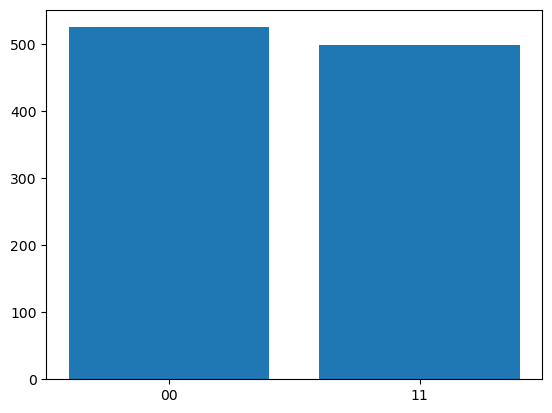

Simulation distribution 1: {'11': 519, '00': 505}


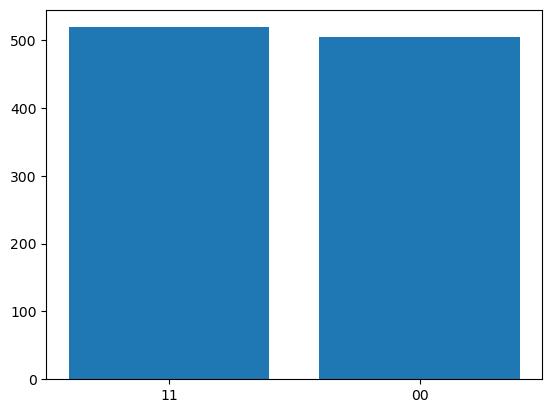

Simulation distribution 2: {'00': 524, '11': 500}


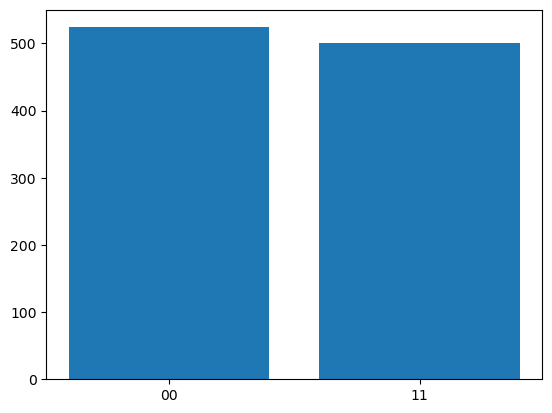

In [5]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):                         # 通过循环三次模拟量子电路来展示其结果的统计性质
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

Take note how quantum registers are both initialized to $|0\rangle$. Therefore, the input to the Bell State Generator is $|00\rangle$. When we simulate the Bell State Generator, we will get an output quantum state that is entangled. This particular output state is the Bell State $|\Phi^+\rangle=\frac{|00\rangle + |11\rangle}{\sqrt{2}}$. For more information about Bell states, see: https://en.wikipedia.org/wiki/Bell_state

### 1.1 __Question 1__: Create a bell state generator that results in entangled states `|01> and |10>`.

In [6]:
## Insert your code in this cell; this should generate the entangled state.  Your code should also create histograms to verify the output.

**Solution:** 
From bell state can have $\left| \beta_{01} \right \rangle = \frac{\left|01\right \rangle + \left|10\right \rangle}{\sqrt{2}}$, therefore should use X gate at the second qubit.

In [39]:
# Create a 2-qubit quantum circuit
qr = QuantumRegister(2, 'q_reg')
cr = ClassicalRegister(2, 'c_reg') # create two classica bits
qc = QuantumCircuit(qr, cr) # create quantum Circuit

# Apply X gate to the second 
qc.x(qr[1])

# Apply H gate to the first 
qc.h(qr[0])

# Apply CNOT gate with the first qubit as control and second as target
qc.cx(qr[0], qr[1])


state_vector = execute(qc,state_vector_sim).result()      
vector = state_vector.get_statevector(qc)                 
print('\nSTATEVECTOR: ', vector)                         

qc.measure(qr, cr)                                        

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc.draw())                                          #


STATEVECTOR:  [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]

QUANTUM CIRCUIT DIAGRAM:
         ┌───┐     ┌─┐   
q_reg_0: ┤ H ├──■──┤M├───
         ├───┤┌─┴─┐└╥┘┌─┐
q_reg_1: ┤ X ├┤ X ├─╫─┤M├
         └───┘└───┘ ║ └╥┘
c_reg: 2/═══════════╩══╩═
                    0  1 


In [40]:
print('\nQASM SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')


QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[2];
creg c_reg[2];
x q_reg[1];
h q_reg[0];
cx q_reg[0],q_reg[1];
measure q_reg[0] -> c_reg[0];
measure q_reg[1] -> c_reg[1];



SIMULATION RESULTS:
Simulation distribution 0: {'01': 509, '10': 515}


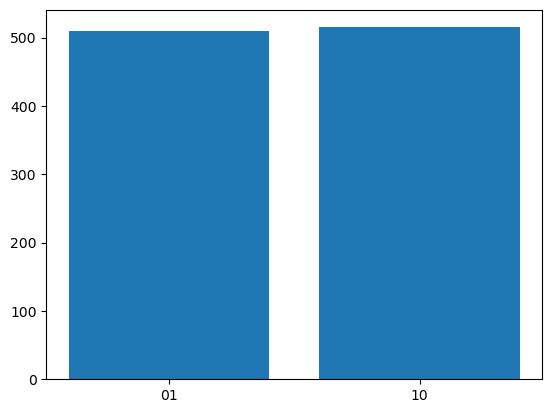

Simulation distribution 1: {'01': 525, '10': 499}


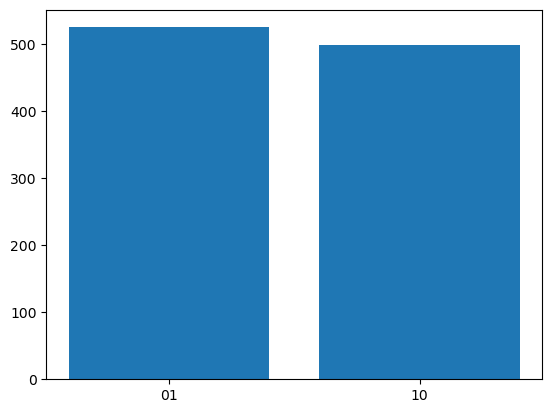

Simulation distribution 2: {'10': 503, '01': 521}


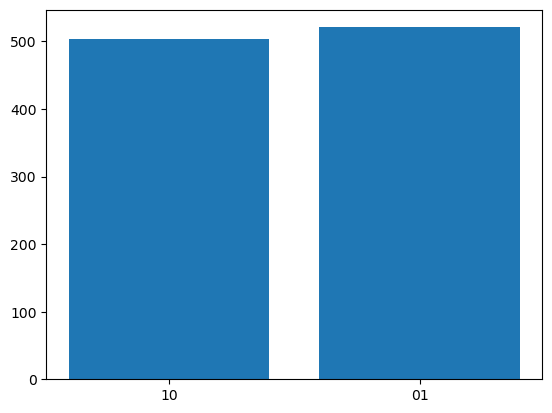

In [41]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):                         # 通过循环三次模拟量子电路来展示其结果的统计性质
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

## 2. Run Entanglement Generator on a Real Quantum Computer

To use this notebook, you must copy your API token from the "My Account" page on the IBM Q Experience.  (You should already have an account that you created for Homework 2, but if you do not, please see https://github.com/Qiskit/qiskit-ibmq-provider.)

More information about the tokens is available in the instructions document for this homework.  Also, be aware that the
commented out "IBMProvider.save_account(token, overwrite=True)" should be uncommented the first time you run this code since your token will be
saved to your local disk drive.  You can comment out this line afterward, since your token will have already been saved.

In [10]:
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit.tools.monitor import job_monitor

# Paste your token from the IBM Q here:
token = "af20cdee3bd074af935caeefbd7a21adb4914ed92587f43f761e1f073f7c8a65a40a20b7def7a7e82db31f31c8e0d83ccaed9f63c5fa5b6c6001b18bff5743bb"

# The following statement 'save.account' only needs to be run once, since your token will be saved to disk.
IBMProvider.save_account(token, overwrite=True)
try:
    provider = IBMProvider()
    backend = provider.get_backend('ibmq_qasm_simulator')
    
except:
    print(
        """WARNING: No valid IBMQ credentials found on disk.
             You must store your credentials using IBMQ.save_account(token, url).
             For now, there's only access to local simulator backends..."""
    )
    exit(0)
    pass


This shows the types of IBM backend cloud devices. Note that each backend has a specific qubit architecture.

In [11]:
# See a list of available backends.
ibmq_backends = provider.backends()
print("Remote backends: ", ibmq_backends)

Remote backends:  [<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>]


We will select the least busy backend with at least 2 qubits

In [12]:
# Allocate the least busy device with at least 2 qubits.
try:
    least_busy_device = least_busy(
        provider.backends(filters=lambda x: x.configuration().n_qubits >= 2, simulator=False)
    )
except:
    print("All devices are currently unavailable.")

In [13]:
# Output selected device based on least queue/load.
print("Running on current least busy device: ", least_busy_device)

Running on current least busy device:  <IBMBackend('ibm_nairobi')>


### __Question 2__: Describe the specific IBM backend you will use, as assigned above.
Please note that there are several valid ways to answer this question, but a generic description of quantum hardware is not one of them.  
For full credit, you must do two things:
1. Provide at least three _specific_ properties of the machine that you will use.  Hint: Qiskit provides ways to obtain such information, so you do not need to search for machine-specific information on other websites.
2. Summarize that information using a few sentences.  For full credit, these need to be complete sentences, preferably organized in a logical manner.

Insert the answer to Question 2 HERE.

Solution:

In [14]:
# Fetching properties of the ibm_nairobi backend
backend_nairobi = provider.get_backend('ibm_nairobi')
properties_nairobi = backend_nairobi.properties()

# Extracting three specific properties:
qubit_count_nairobi = backend_nairobi.configuration().n_qubits
backend_version_nairobi = properties_nairobi.backend_version

# Extracting three specific properties:
qubit_count_nairobi = backend_nairobi.configuration().n_qubits
backend_version_nairobi = properties_nairobi.backend_version
operational_status = backend_nairobi.status().operational


print(f"Number of Qubits: {qubit_count_nairobi}")
print(f"Backend Version: {backend_version_nairobi}")
print(f"Is Backend Operational: {operational_status}")

# Extract gate errors for all qubit pairs
average_gate_errors = []
for i in range(qubit_count_nairobi):
    for j in range(i+1, qubit_count_nairobi):
        try:
            error = properties_nairobi.gate_error('cx', [i, j])
            average_gate_errors.append(error)
        except:
            continue

# Calculate the average error if there are any errors found
if average_gate_errors:
    average_error = sum(average_gate_errors) / len(average_gate_errors)
    print(f"Average CX Gate Error: {average_error}")
else:
    print("Could not determine average CX gate error.")


Number of Qubits: 7
Backend Version: 1.3.3
Is Backend Operational: True
Average CX Gate Error: 0.008786661930737924


The ibm_nairobi quantum backend boasts 7 qubits, ensuring versatile computational capability. Operating on version 1.3.3, it represents the latest in IBM's quantum advancements. Impressively, its precision is underscored by an average CX gate error of merely about 0.0088, emphasizing its accuracy in operations. Currently operational, it stands ready for quantum research and tasks.

---------------------------------------------------------------------------------------------------------------------------------


STATEVECTOR:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

QUANTUM CIRCUIT DIAGRAM:


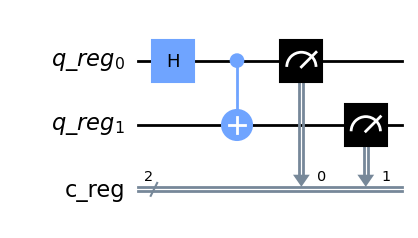

In [15]:
from qiskit import QuantumCircuit
from qiskit import execute, BasicAer
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumRegister, ClassicalRegister    # add

qr = QuantumRegister(2, 'q_reg')
cr = ClassicalRegister(2, 'c_reg')
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])

# Must find state vector for wavefunction before you add measurement operators,
# because measurement operators cause statefunction collapse.
state_vector_sim = BasicAer.get_backend('statevector_simulator')   # add
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")


QUANTUM CIRCUIT DIAGRAM:
         ┌───┐     ┌─┐   
q_reg_0: ┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q_reg_1: ─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
c_reg: 2/═══════════╩══╩═
                    0  1 

QASM CIRCUIT SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[2];
creg c_reg[2];
h q_reg[0];
cx q_reg[0],q_reg[1];
measure q_reg[0] -> c_reg[0];
measure q_reg[1] -> c_reg[1];

ACTUAL EXECUTION RESULTS:
Actual execution distribution 0: {'10': 12, '11': 258, '00': 231, '01': 11}


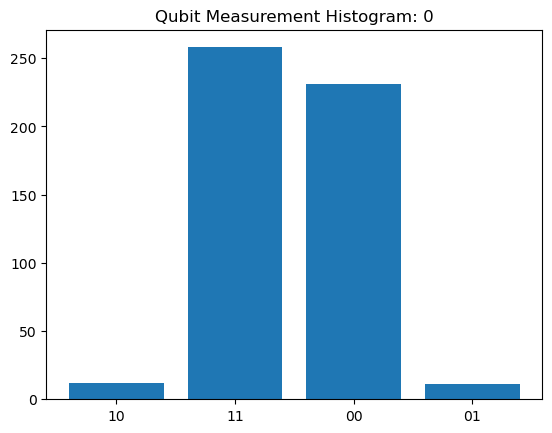

Actual execution distribution 1: {'11': 245, '00': 238, '10': 17, '01': 12}


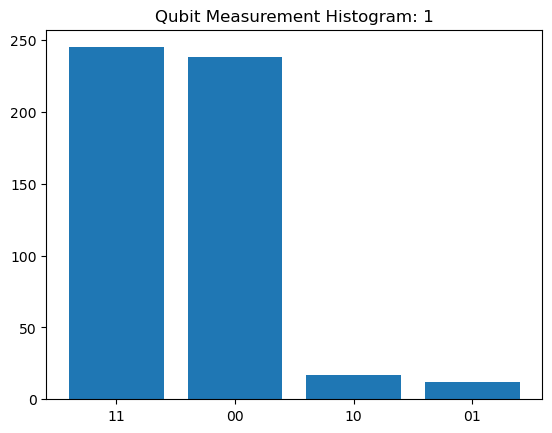

Actual execution distribution 2: {'10': 10, '11': 241, '00': 251, '01': 10}


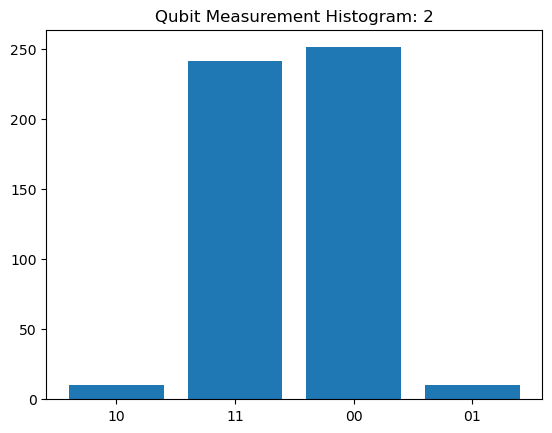

In [16]:
import matplotlib.pyplot as plt   # Add
# Output the specified quantum circuit.
print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc.draw())
print('\nQASM CIRCUIT SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')
       
# Execute the quantum circuit and output the results of the execution.
print('\nACTUAL EXECUTION RESULTS:')
for i in range(0,3):
    
    job_exp = execute(qc, least_busy_device, shots=512)
    result_exp = job_exp.result()
    counts = result_exp.get_counts(qc)
    print('Actual execution distribution %d:'%i, counts)
    
    plt.title("Qubit Measurement Histogram: "+str(i))
    plt.bar(counts.keys(),counts.values())
    plt.show()


### 2.1 __Question 3__: Describe the histogram distributions between the ideal simulator and the quantum computer. What could be causing these differences?
Please note that for full credit, your answer needs to be written in logically-ordered, complete sentences. 

Insert the answer to Question 3 HERE

**Solution:** From the provided histograms of the actual quantum computer results, we observe that:

The states $\left|00 \right \rangle$ and $\left |11 \right \rangle$ are indeed the most frequently measured states, but they do not appear 50% of the time each.
There are also non-negligible occurrences of the states $\left|01 \right \rangle$ and $\left|10 \right \rangle$, which ideally shouldn't be present.
The differences between the ideal simulator results and the quantum computer results can be attributed to the following reasons:

**Quantum Noise**: Real quantum devices are not perfect and are affected by various types of noise, which can lead to erroneous outcomes.

**Gate Fidelity**: Quantum gates in real devices have less than perfect fidelity. This means that when a gate is applied, it might not produce the exact desired transformation on the qubits due to imperfections.

**Decoherence**: Over time, qubits can lose their quantum properties due to interactions with their environment, leading to unwanted outcomes.

**Measurement Errors**: The process of reading out the value of a qubit, or measurement, is also subject to errors, causing discrepancies in the final counts.

--------------------------------------------------------------------------------------------------

### 2.2 __Question 4__: Explain how coupling maps shown for your device (see below) impact errors.
Please note that for full credit, your answer needs to be written in logically-ordered, complete sentences. 

Insert the answer to Question 4 HERE

**Solution:** 
**Direct Interactions Only**: The connecting lines between the qubits indicate which qubits can interact directly with one another. If a quantum algorithm requires interaction between two qubits that aren't directly connected, auxiliary operations (like SWAP gates) are needed to bring those qubits into interaction. These additional operations increase the circuit depth, which in turn can increase the probability of errors. For example: If want to perform a controlled operation (like a CNOT gate) between qubits 0 and 2. Even though these qubits are neighbors on the diagram, there's no direct line connecting them. To perform the operation, we might first need to do a SWAP with qubit 1, perform the CNOT between qubits 1 and 2, and then swap the states of qubits 0 and 1 back to their original positions. These additional operations increase the potential for error.

**Non-Uniform Error Rates**: Not all qubit connections have the same fidelity. Some qubit pairs might exhibit higher error rates for two-qubit operations compared to others. This means that choosing which qubits to use for certain operations can influence the overall error rate of the quantum circuit. For example: Suppose an operation needs to be executed from qubit 0 to qubit 6. If the path via qubits 1 and 2 has a higher error rate, but the path via qubits 3 and 5 has a lower error rate, then choosing the latter might be wiser. Even though the path might be longer, its lower error rate could render it more stable overall.

**Constrained Circuit Design**: Since qubits can only interact with certain others, the design of quantum circuits needs to be tailored to fit this constraint. This can sometimes lead to suboptimal designs or the necessity for more complex compensating operations, both of which can lead to higher error rates. For example: Suppose have a quantum algorithm that, for optimal performance, requires frequent interactions between qubits 4 and 6. Given the coupling map, every interaction between these qubits will need to pass through qubit 5, which might limit how efficiently can implement the algorithm.

**Potential for Cross-talk**: In physical quantum devices, when two qubits are operated on simultaneously, there's a potential for interference or "cross-talk". This can induce errors if not accounted for. Understanding the coupling map can help in scheduling operations to minimize such effects. For Example:  If it's performing operations simultaneously on qubits 1 and 2, and on qubits 4 and 5, these pairs are close on the coupling map. There could be potential cross-talk between these operations, introducing unintended errors.


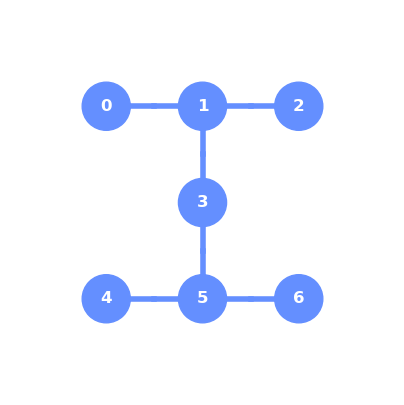

In [17]:
from qiskit.visualization import plot_gate_map

plot_gate_map(least_busy_device)

## 3. Control Z Gate and Phase Kickback

Below is a setup of two qubits in superposition $\frac{| 0\rangle +  | 1\rangle}{2}$ and $\frac{| 0\rangle -  | 1\rangle}{2}$, which are known as the $|+\rangle$ and $|-\rangle$ states.

In [18]:
from qiskit.visualization import plot_bloch_multivector

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

/var/folders/0s/0fy2304d1tz2dnd34sbh_fnc0000gn/T/ipykernel_11453/2877105809.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  final_state = simulator.run(qobj).result().get_statevector()


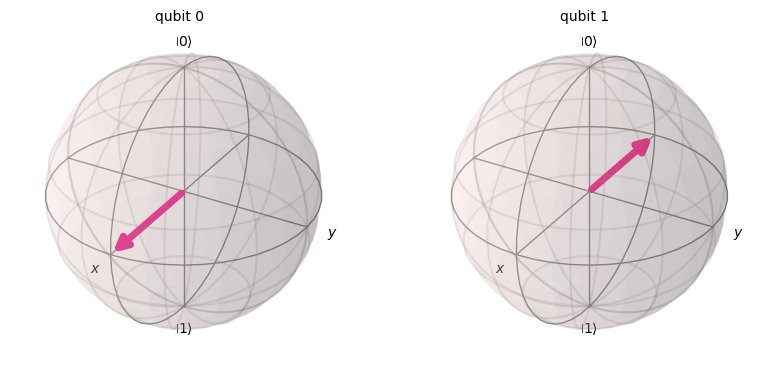

In [19]:
qc = QuantumCircuit(2)
qc.h(0)

qc.x(1)
qc.h(1)

display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = simulator.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

Below we apply a controlled phase gate, with phase $\pi/4$.

┌───┐              
q_0: ┤ H ├──────■───────
     ├───┤┌───┐ │P(π/4) 
q_1: ┤ X ├┤ H ├─■───────
     └───┘└───┘

/var/folders/0s/0fy2304d1tz2dnd34sbh_fnc0000gn/T/ipykernel_11453/1720759394.py:15: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  final_state = simulator.run(qobj).result().get_statevector()


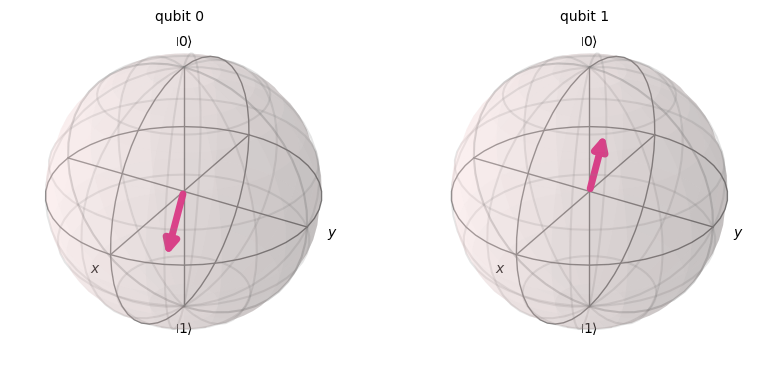

In [20]:
qc = QuantumCircuit(2)

qc.h(0)

qc.x(1)
qc.h(1)

qc.cp(np.pi/4, 0, 1)


display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = simulator.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

### 3.1 __Question 5__: Note that the phase is shifted for both qubits.  Describe why this is the case.
You may do this in any way that is accurate, complete, logical, and clearly illustrates that you understand what is happening.  For example, you might use a mathematical justification (step-by-step Dirac notation), mathematical formula with text, or some combination of both.

**Solution**: The initial state of the system is given by: $  |\psi_1\rangle = (|+\rangle \otimes |-\rangle) = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $
where:
$|+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$
$|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$

Applying the Controlled Phase Gate: The controlled phase gate applies a phase of $\pi/4$ to the target qubit, but only when the control qubit is in the state $\left|1\right \rangle $.

The operation can be seen as:$|10\rangle \to |10\rangle, |11\rangle \to e^{i\pi/4} |11\rangle$

Thus, the state after the controlled phase gate is: $|\psi_2\rangle = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - e^{i\pi/4}|11\rangle) $

Mathematical Justification: break down the  $\left|11\right \rangle $ state:
$e^{i\pi/4}|11\rangle = \frac{1}{2} (e^{i\pi/4} |1\rangle \otimes e^{i\pi/4} |1\rangle) = \frac{1}{2} (e^{i\pi/8} |1\rangle \otimes e^{-i\pi/8} |1\rangle) $

This result indicates that, due to the action of the controlled phase gate, both the control and target qubits pick up a phase. That is, both qubits experience a phase change. The control qubit picks up a phase of $ e^{i\pi/8} $ and the target qubit picks up a phase of $ e^{-i\pi/8} $.

Therefore,  The phenomenon of phase kickback is crucial for several quantum algorithms and protocols. It is a unique property of quantum mechanics where operations on one qubit can induce changes in another qubit, even if there isn't an explicit operation targeting it. The controlled phase gate example is a manifestation of this quantum behavior where the imposition of a phase on the target qubit also affects the control qubit due to their entangled nature.


------------------------------------------------------------------------------

## 4. __Question 6__: Create a program that results in state $\frac{|010\rangle+|101\rangle}{\sqrt{2}}$, and test with visualizations.
Note you may use simulator backends for this problem.  This is an example of a Greenberger-Horne-Zeilinger (GHZ) entanglement state.  You can find out more about GHZ states here: https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state

In [ ]:
# Insert your code in this cell.

The Greenberger-Horne-Zeilinger state is a type of maximmaly entangled quantum state. For three qubits, a common form of the GHZ state is: $\frac{\left|000 \right \rangle + \left|111 \right \rangle}{\sqrt{2}}$. The $\frac{|010\rangle+|101\rangle}{\sqrt{2}}$ is a variation on the GHZ state. 
1. Start with the initial state $\left|000 \right \rangle$
2. Apply a Hadamard gate to the first qubit to produce a superposition: $\frac{\left|0 \right \rangle+\left|1 \right \rangle}{\sqrt{2}} \otimes \left|00 \right \rangle = \frac{|000\rangle+|100\rangle}{\sqrt{2}}$
3. Use a controlled-X gate (CNOT) between the first and second qubits: $\frac{|000\rangle+|110\rangle}{\sqrt{2}}$
4. Use another CNOT gate, this time between the first qubit and the third qubit: $\frac{|000\rangle+|111\rangle}{\sqrt{2}}$
5. Finally, apply an X gate to the second qubit to flip it:  $\frac{|010\rangle+|101\rangle}{\sqrt{2}}$

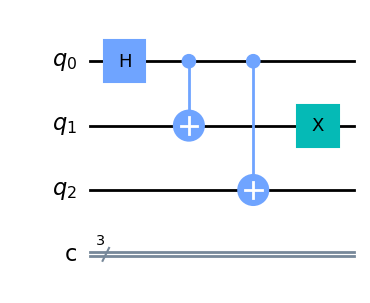

In [1]:
# Importing necessary libraries
from qiskit import Aer, QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Initialize a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)  # added 3 classical bits for measurement

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate between the first and second qubits
qc.cx(0, 1)

# Apply a CNOT gate between the first and third qubits
qc.cx(0, 2)

# Apply a Pauli-X gate on the second qubit
qc.x(1)

# Display the quantum circuit
qc.draw('mpl')

/var/folders/0s/0fy2304d1tz2dnd34sbh_fnc0000gn/T/ipykernel_5298/773375647.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


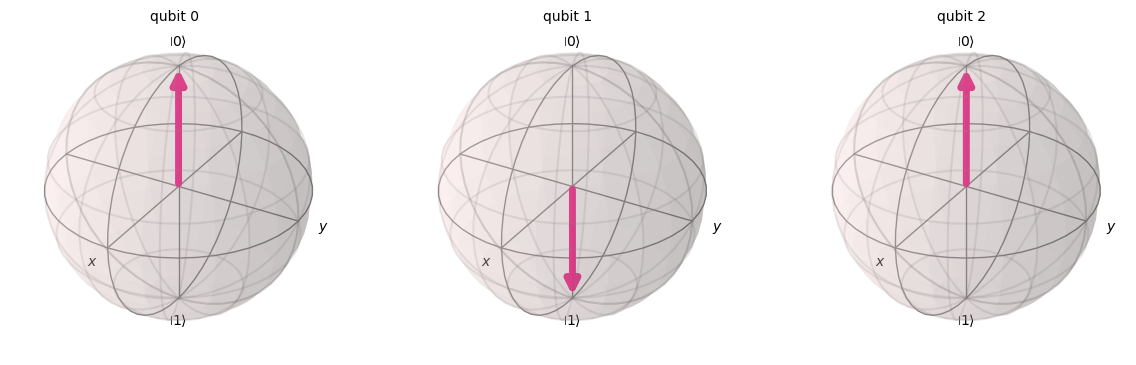

In [4]:
# Get the statevector of the circuit
backend = Aer.get_backend('statevector_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
result = backend.run(qobj).result()
statevector = result.get_statevector()

# Visualize the statevector on the Bloch sphere
plot_bloch_multivector(statevector)

/var/folders/0s/0fy2304d1tz2dnd34sbh_fnc0000gn/T/ipykernel_5298/773375647.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


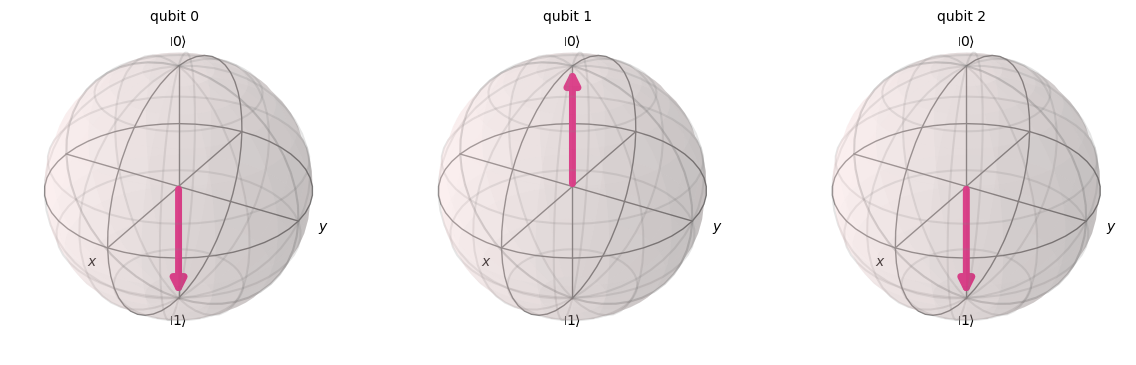

In [16]:
# Get the statevector of the circuit
backend = Aer.get_backend('statevector_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc)
result = backend.run(qobj).result()
statevector = result.get_statevector()

# Visualize the statevector on the Bloch sphere
plot_bloch_multivector(statevector)

/var/folders/0s/0fy2304d1tz2dnd34sbh_fnc0000gn/T/ipykernel_5298/2444443821.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


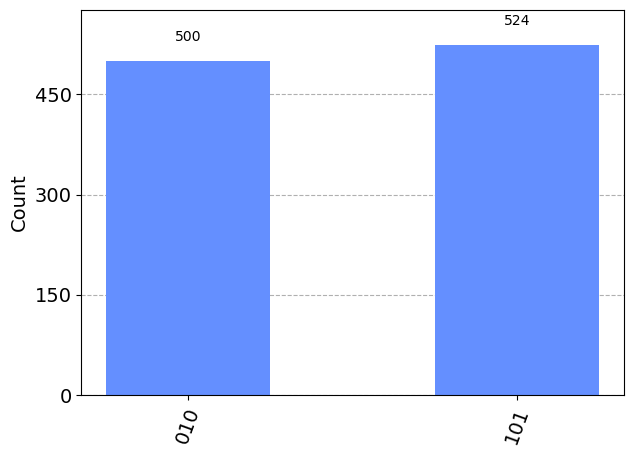

In [17]:
qc.measure([0, 1, 2], [0, 1, 2])

# Simulate the quantum circuit
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
qobj = assemble(t_qc, shots=1024)
result = backend.run(qobj).result()

# Get the measurement counts
counts = result.get_counts()

# Visualize the results
plot_histogram(counts)

## 5. Export this Jupyter notebook to html and submit it by emailing to erhenderson@smu.edu, hendersonj@smu.edu, and mitch@smu.edu.